In this project, we will analyze data on Arctic ice extent from 1978 to 2021, examining the months with the highest and lowest ice extent and comparing the median values over the years.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_path_from_config import get_path

In [18]:
# We load the data
ice_path = get_path('ice_path')
if ice_path is not None:
    data = pd.read_csv(ice_path)
else:
    print("CSV file path not configured.")

data.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,10.231,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,10.420,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,10.557,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,10.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [4]:
# We'll eliminate the first row of out data because it's problematic
data = data.drop (labels = 0, axis = 0)

#Default data has blank spaces in several column names, so we'll remove them
colnames = []

for i in data.columns.values:
    i = i.replace (" ", "")
    colnames.append (i)

data.columns = colnames

Now we'll check the month where it's more likely to have bigger and smaller ice extensions

In [5]:
data1 = data [["Month", "Extent"]]
print (data1.sort_values("Extent", ascending = False).head (10))
print (data1.sort_values("Extent", ascending = True).head (10))


     Month       Extent
64      03       16.635
62      02       16.579
66      03       16.568
63      02       16.551
67      03       16.547
68      03       16.536
69      03       16.513
73      03       16.505
72      03       16.467
65      03       16.457
        Month       Extent
10729      09        3.340
10728      09        3.378
10726      09        3.399
10730      09        3.408
10727      09        3.408
10724      09        3.416
10725      09        3.417
10719      09        3.451
10731      09        3.452
10723      09        3.452


We can see that these months are March and September, respectively. The result was predictable, as the highest ice concentrations coincide with the end of winter, and the lowest with the end of summer

Let's plot the median values of each month

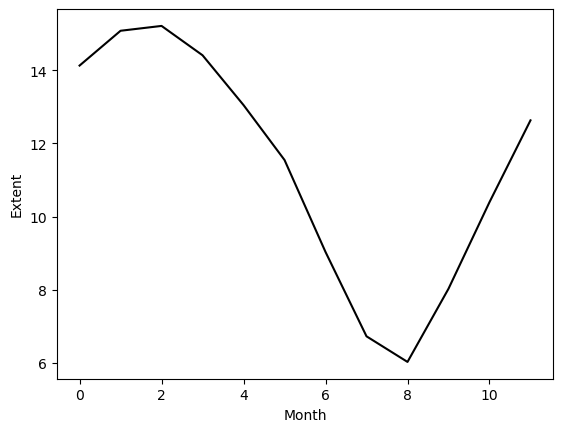

In [6]:
data["Month"] = data["Month"].str.strip()

median_month = []

months = np.array (["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"])

for i in months:
    data_month = data[data["Month"] == i]
    median_month.append (data_month["Extent"].median())

plt.plot (median_month, color = "black")
plt.xlabel("Month")
plt.ylabel("Extent");

We add a shaded region corresponding to the 5th and 95th percentiles of each month

In [7]:
# We convert the 'Extent' column to integer because it's originally in text, and we can't calculate the percentile
data ["Extent"] = data ["Extent"].astype(float)

top_95 = []
top_5 = []

for i in months:
    data_month = data[data["Month"] == i]
    top_95.append (data_month.Extent.quantile(0.05))
    top_5.append (data_month.Extent.quantile(0.95))

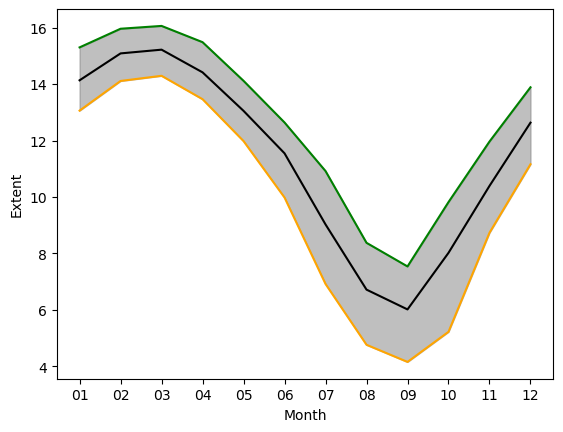

In [8]:
plt.plot (median_month, color = "black")
plt.xlabel("Month")
plt.ylabel("Extent")

plt.plot ((top_95), color = "orange")
plt.plot ((top_5), color = "green")
plt.fill_between(months, top_5, top_95, alpha=0.5, color="grey");

We add a line for the 2021 data and another one for the 2012 data

In [9]:
data_12 = data [data.Year == '2012']
data_21 = data [data.Year == '2021']

median_2012 = []
median_2021 = []

for i in months:
    data_month_12 = data_12[data_12["Month"] == i]
    data_month_21 = data_21[data_21["Month"] == i]
    median_2012.append (data_month_12.Extent.median())
    median_2021.append (data_month_21.Extent.median())

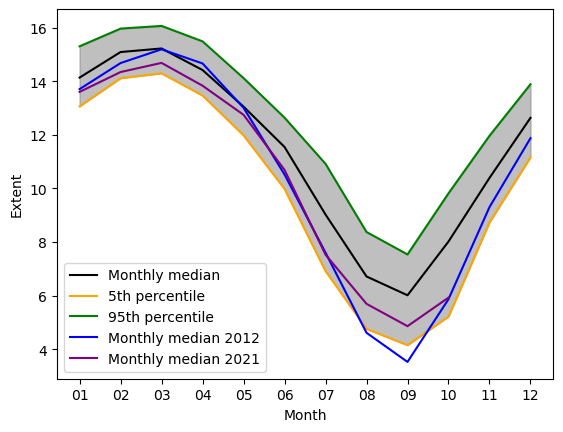

In [16]:
line = plt.plot (median_month, color = "black")
plt.xlabel("Month")
plt.ylabel("Extent")

line1 = plt.plot ((top_95), color = "orange")
line2 = plt.plot ((top_5), color = "green")
line3 = plt.plot ((median_2012), color = "blue")
line4 = plt.plot ((median_2021), color = "purple")

plt.fill_between(months, top_5, top_95, alpha=0.5, color="grey")
plt.legend(["Monthly median", "5th percentile", "95th percentile", "Monthly median 2012", "Monthly median 2021"]);

The graph indicates that the median extent throughout the year reaches its maximum in the spring months and its minimum in the autumn months. The data for 2012 appears to have higher variability compared to the average median data, with extension values falling below the 5th percentile in the autumn. It can be observed that this variability has smoothed out in the 2021 data